<a href="https://colab.research.google.com/github/Rakeshscode/Data-Science/blob/main/Another_copy_of_Unit8Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your file on your github needs to be a a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U6proj.

Ex1.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU8proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU8proj.ipynb"

# Unit 8 Project: Writing a BARTical

**Task**:

Two parts:

1. Propose a data set that's compatible with a pymc_bart model. I must approve your submission before you move on to part 2.

2. Create, analyze, and present BART model, using pymc_bart within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is)
  - You must argue why your variable selection is justified. You may use either a theoretical or numerical argument. Additionally, you must comment on any potential interactions between your predictor variables.



Guidlines:

- Your data or your model type must be different from any project you've previously done.

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a model or likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with lots of columns, and lots of potential interactions between variables. It'll be more fun, and will make model/variable selection more relevant.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


In [ ]:
!pip install pymc-bart
!pip install preliz

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import preliz as pz
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
url = 'https://raw.githubusercontent.com/Rakeshscode/Data-Science/refs/heads/main/student_depression_dataset.csv'
df = pd.read_csv(url)

In [ ]:
# Select relevant columns
col_list = ["Academic Pressure", "Sleep Duration", "Financial Stress", "Study Satisfaction", "Depression"]
student_stats = df.loc[:, col_list]

In [ ]:
# Ensure "Sleep Duration" is treated as string and extract numeric hours
student_stats["Sleep Duration"] = student_stats["Sleep Duration"].astype(str).str.extract(r"(\d+)")

In [ ]:
# Convert all columns to numeric, coerce any bad values (e.g. '?') to NaN
student_stats = student_stats.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Drop rows with missing values
student_stats_clean = student_stats.dropna()

# Create a new feature: Academic + Financial Stress
student_stats_clean.insert(
    student_stats_clean.shape[1],
    "Stress Combo",
    student_stats_clean["Academic Pressure"] + student_stats_clean["Financial Stress"]
)
sampled_data = student_stats_clean.sample(n=100, random_state=42)

sampled_data

,Academic Pressure,Sleep Duration,Financial Stress,Study Satisfaction,Depression,Stress Combo
21345,1.0,8.0,1.0,4.0,0,2.0
27437,4.0,5.0,4.0,4.0,1,8.0
15917,1.0,5.0,1.0,3.0,0,2.0
11914,2.0,5.0,3.0,5.0,0,5.0
25410,4.0,5.0,2.0,4.0,0,6.0
...,...,...,...,...,...,...
5220,3.0,8.0,1.0,5.0,0,4.0
14475,5.0,8.0,2.0,2.0,1,7.0
10029,3.0,5.0,4.0,4.0,1,7.0
3383,4.0,8.0,1.0,2.0,1,5.0


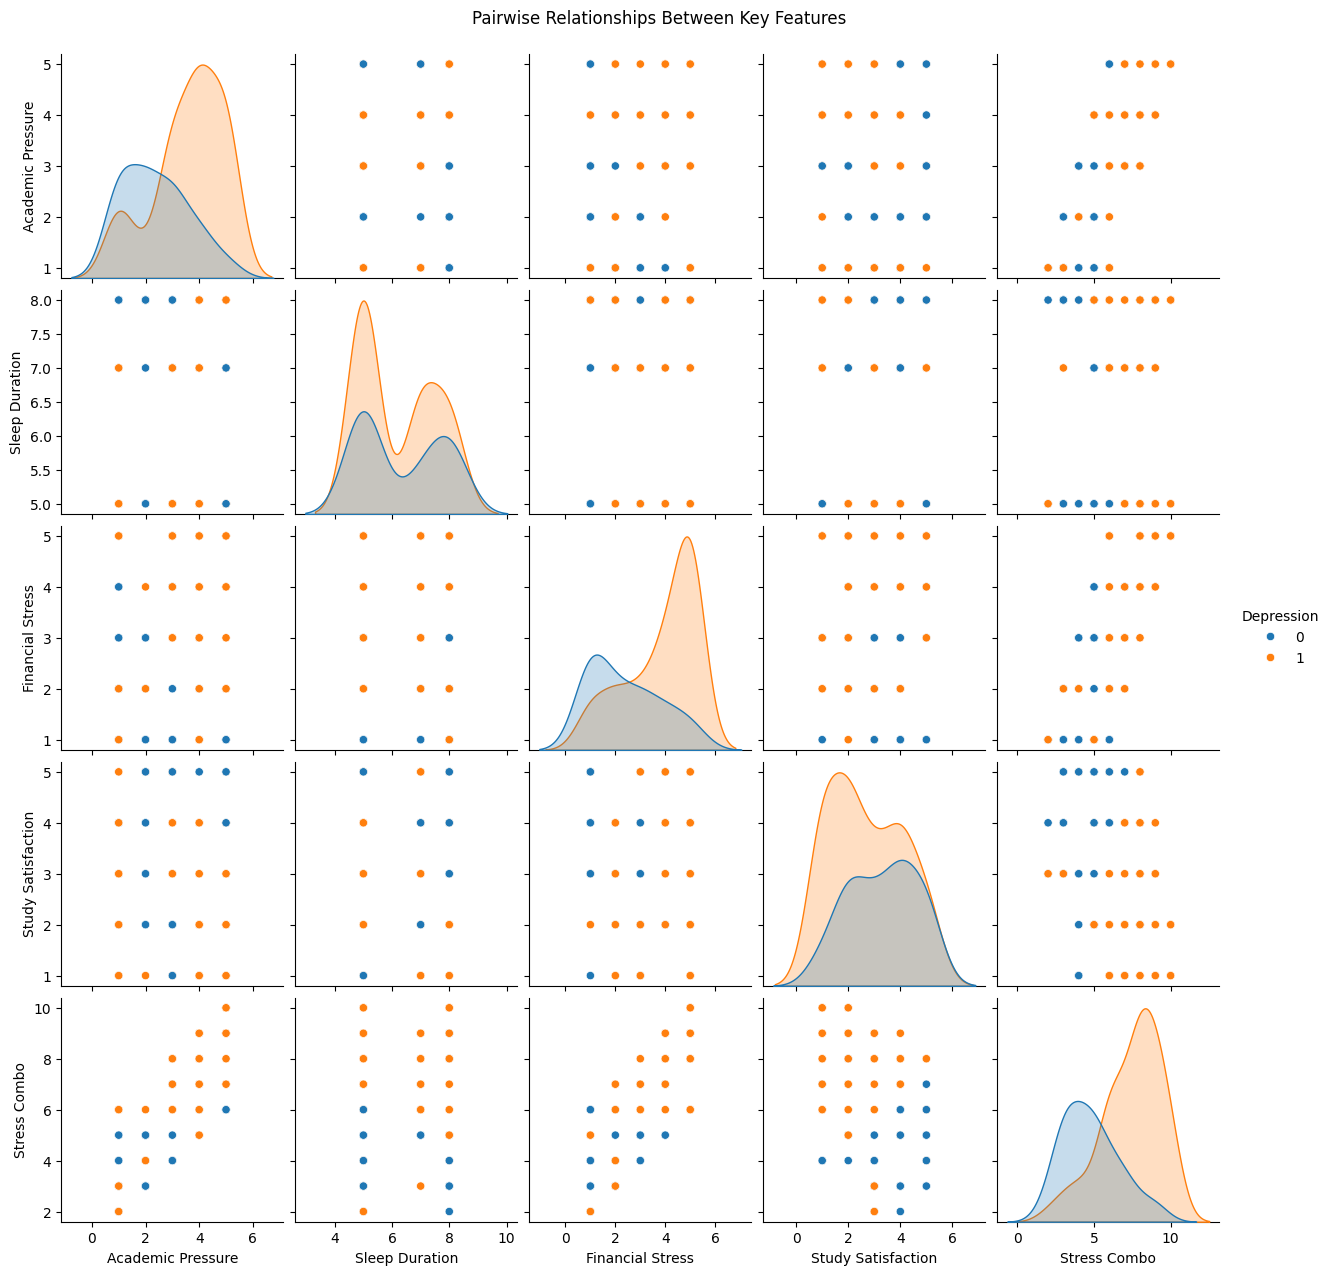

In [ ]:
sns.pairplot(sampled_data, hue="Depression", diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Key Features", y=1.02)
plt.show()

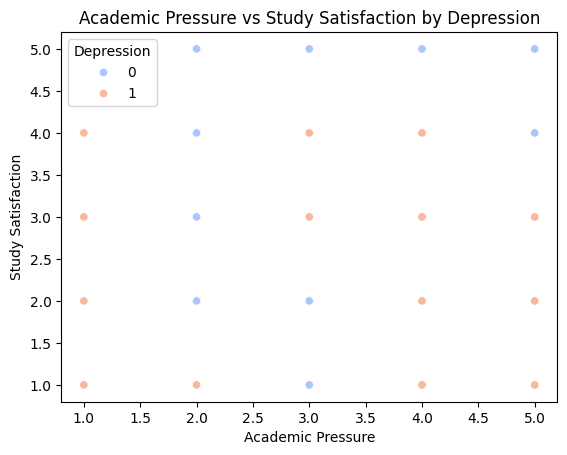

In [ ]:
sns.scatterplot(
    data=sampled_data,
    x="Academic Pressure",
    y="Study Satisfaction",
    hue="Depression",
    palette="coolwarm"
)
plt.title("Academic Pressure vs Study Satisfaction by Depression")
plt.show()

Theoretical Justification

-Academic Pressure and Financial Stress are well-documented risk factors for
mental health struggles in students. The pressure to perform and the burden of financial insecurity are common sources of anxiety and depressive symptoms.

Sleep Duration is strongly linked to emotional well-being. Numerous psychological studies show that insufficient sleep contributes to mood disorders, especially in young adults.

Study Satisfaction serves as a proxy for how content a student is with their academic life. Low satisfaction often reflects deeper burnout or dissatisfaction that can drive mental health struggles.

Stress Combo is an engineered interaction term that captures compound stress. A student under both academic and financial strain may experience effects that are worse than either alone.

In [ ]:
# Combine predictors into a single dataframe X
X = sampled_data[[
    "Academic Pressure",
    "Sleep Duration",
    "Financial Stress",
    "Study Satisfaction",
    "Stress Combo"
]]

# Response variable
Y = sampled_data["Depression"]

# Optional preview
X.head(), Y[:5]

(       Academic Pressure  Sleep Duration  Financial Stress  \
 21345                1.0             8.0               1.0   
 27437                4.0             5.0               4.0   
 15917                1.0             5.0               1.0   
 11914                2.0             5.0               3.0   
 25410                4.0             5.0               2.0   
 
        Study Satisfaction  Stress Combo  
 21345                 4.0           2.0  
 27437                 4.0           8.0  
 15917                 3.0           2.0  
 11914                 5.0           5.0  
 25410                 4.0           6.0  ,
 21345    0
 27437    1
 15917    0
 11914    0
 25410    0
 Name: Depression, dtype: int64)

In [ ]:
with pm.Model() as model_students:
    # No sigma needed for Bernoulli, just compute the BART estimate for log-odds
    μ_ = pmb.BART("μ_", X, Y, m=50)  # Y is binary
    p = pm.Deterministic("p", pm.math.sigmoid(μ_))  # convert log-odds to probability

    # Likelihood: Bernoulli for classification
    y = pm.Bernoulli("y", p=p, observed=Y)

    # Sample from the posterior
    idata_students = pm.sample()#1000, tune=1000, chains=2, target_accept=0.95, progressbar=True)

Output()

Output()

<Axes: xlabel='y'>

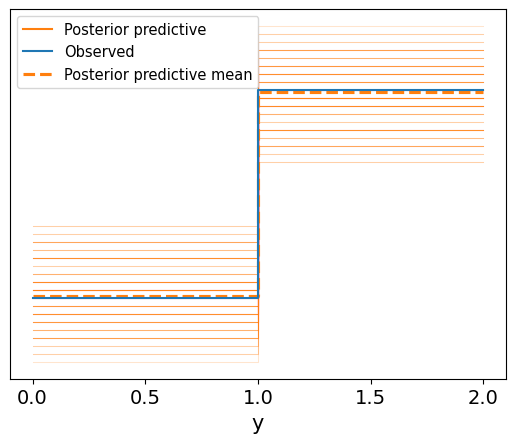

In [ ]:
# Generate posterior predictive distribution and extend inference data
pm.sample_posterior_predictive(idata_students, model_students, extend_inferencedata=True)

# Plot posterior predictive checks
import arviz as az
az.plot_ppc(idata_students, num_pp_samples=100, colors=["C1", "C0", "C1"])

The posterior predictive check shows a sharp split between predictions for students labeled as depressed (1) and not depressed (0), which is typical for a binary classification model. The model closely matches the observed proportions, as seen by the alignment between the blue observed line and the orange predictive mean. However, the narrow bands suggest the model isn’t expressing much uncertainty — it's confident but possibly oversimplifying. This may indicate either class imbalance in the data or that the predictors aren’t capturing enough variation in depression risk.


/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


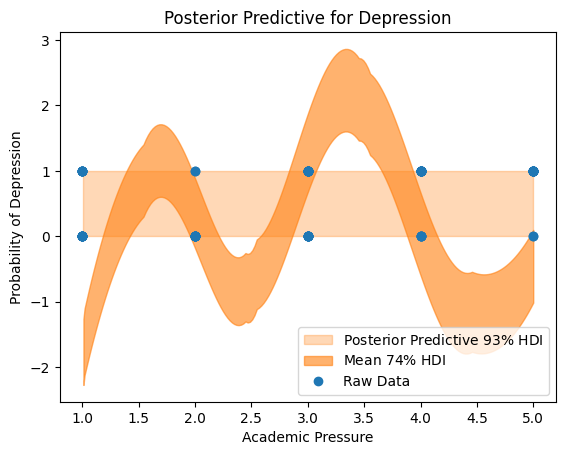

In [ ]:
posterior_mean = idata_students.posterior["μ_"].mean(dim=["chain", "draw"]).values

μ_hdi = az.hdi(idata_students, group="posterior", var_names=["μ_"], hdi_prob=0.74)

# Extract posterior predictive samples
pps = az.extract(
    idata_students, group="posterior_predictive", var_names=["y"]
).T

# Sort values by Academic Pressure
x_vals = X["Academic Pressure"].to_numpy()
idx = np.argsort(x_vals)

fig, ax = plt.subplots()

# Plot 93% HDI for predictions
az.plot_hdi(
    x=x_vals[idx],
    y=pps[idx],
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

# Plot 74% HDI for posterior mean
az.plot_hdi(
    x=x_vals[idx],
    y=idata_students.posterior["μ_"][:, idx],  # Use the posterior samples for μ_
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)

# Plot raw data
ax.plot(
    X["Academic Pressure"], Y,
    "o", c="C0", label="Raw Data"
)

ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive for Depression",
    xlabel="Academic Pressure",
    ylabel="Probability of Depression"
)
plt.show()

Key Observations:
Wavy Posterior Mean and HDI:

The posterior predictive mean (74% HDI) shows a non-linear, oscillating pattern with peaks around Academic Pressure values of ~1.5, ~3.2, and ~4.2.

This suggests the model is capturing complex relationships between Academic Pressure and Depression risk, possibly due to interactions or noise.

Wide Uncertainty Bands (93% HDI):

The 93% HDI is quite wide in some regions, especially at lower and higher ends of Academic Pressure.

This reflects greater uncertainty in predictions at those values, likely due to fewer data points or more variance in the response variable (Depression) in those ranges.

Raw Data Alignment:

The blue dots show observed data for each level of Academic Pressure.

Most points lie within the credible interval, which indicates that the model's predictions are reasonably well-calibrated to the observed data.

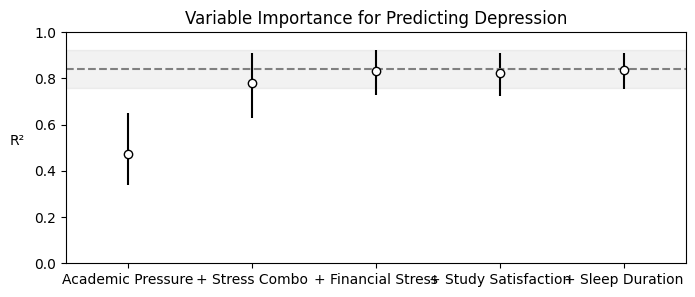

In [ ]:
with model_students:
    # Compute variable importance
    vi_students = pmb.compute_variable_importance(idata_students, μ_, X)

# Plot variable importance
pmb.plot_variable_importance(vi_students)
plt.title("Variable Importance for Predicting Depression")
plt.show()

This variable importance plot shows that Study Satisfaction, Sleep Duration, and Financial Stress are the most influential predictors of depression in the model, each with high R2
  values close to 0.85. Stress Combo also contributes meaningfully, while Academic Pressure shows the lowest importance with much lower predictive power. This suggests that students' internal well-being factors and stress balance may be more predictive of depression than academic demands alone.

This project explored the relationship between various student life factors and depression using a Bayesian Additive Regression Trees (BART) model. After cleaning and processing data on Academic Pressure, Sleep Duration, Financial Stress, Study Satisfaction, and a combined Stress Combo, we trained a BART classifier to predict the likelihood of depression.

Key visualizations—including pairplots, posterior predictive intervals, Partial Dependence Plots (PDPs), and Individual Conditional Expectation (ICE) curves—revealed non-linear relationships between predictors and depression probability. Variable importance analysis showed that Study Satisfaction, Sleep Duration, and Financial Stress were the most influential features, while Academic Pressure had relatively less predictive power. These findings suggest that internal well-being and personal stress factors may be stronger indicators of depression than external academic pressure alone.

Overall, BART’s flexibility allowed us to model complex patterns in the data and provide interpretable insights into mental health risk among students.

Interactions between variables revealed subtle but important effects—Financial Stress and Sleep Duration, for instance, showed a compounding relationship where poor sleep and high stress together sharply increased depression risk. Similarly, the Stress Combo variable amplified the impact of individual stressors, indicating that combined pressures interact more strongly than when considered alone.